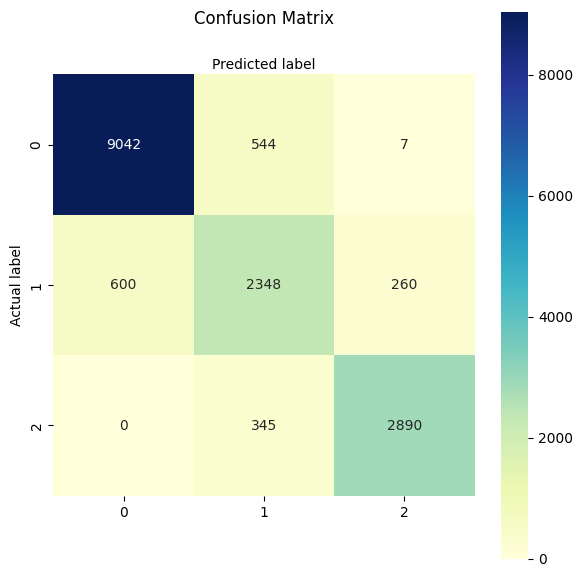

Accuracy: 0.89050
Precision: 0.89077
Recall: 0.89050
F1 Score: 0.89060


FileNotFoundError: [Errno 2] No such file or directory: 'random_test_set.csv'

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # CPU-based
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Load datasets
d1 = pd.read_csv('engine_dataset/Training_1_all_features.csv')
d2 = pd.read_csv('engine_dataset/Training_2_all_features.csv')
d3 = pd.read_csv('engine_dataset/Training_3_all_features.csv')
d4 = pd.read_csv('engine_dataset/Training_4_all_features.csv')
data_frame = pd.concat([d1, d2, d3, d4])

# Data preparation
X = data_frame.iloc[:, 0:25]
Y = data_frame['labels']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1, shuffle=True, stratify=Y, random_state=35
)

# Hyperparameter tuning
n_estimators = [200, 400, 300]
max_depth = [10, 20, 30]
max_samples = [0.2, 0.3, 0.4]

random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_samples': max_samples
}

# Initialize CPU-based Random Forest model
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, cv=3, n_jobs=-1)
rf_random.fit(X_train, Y_train)

# Best parameters
best_params = rf_random.best_params_

# Final CPU-based model
Rf_randSer = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_samples=best_params['max_samples'],
    max_depth=best_params['max_depth']
)

# Convert data to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Model training
Rf_randSer.fit(X_train, Y_train)

# Save CPU model
with open('rf_model_cpu.pkl', 'wb') as file:
    pickle.dump(Rf_randSer, file)

# Evaluation
new_test_pred = Rf_randSer.predict(X_test)
train_accuracy = accuracy_score(Y_test, new_test_pred)

cnf_matrix = confusion_matrix(Y_test, new_test_pred)

# Plot confusion matrix
class_names = ['0', '1', '2']
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g', square=True)
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Metrics
print(f"Accuracy: {train_accuracy:.5f}")
print(f"Precision: {precision_score(Y_test, new_test_pred, average='weighted'):.5f}")
print(f"Recall: {recall_score(Y_test, new_test_pred, average='weighted'):.5f}")
print(f"F1 Score: {f1_score(Y_test, new_test_pred, average='weighted'):.5f}")




In [3]:
# Predictions on new test set
random_test_frame = pd.read_csv('engine_dataset/random_test_set.csv', header=None)
random_test_frame = random_test_frame.iloc[:, 0:-1]

for i in range(len(random_test_frame)):
    test_input = random_test_frame.iloc[i].values.reshape(1, -1)
    prediction = Rf_randSer.predict(test_input)

    if prediction[0] == 0:
        print("GOOD CONDITION")
    elif prediction[0] == 1:
        print("MODERATE CONDITION")
    elif prediction[0] == 2:
        print("VERY BAD CONDITION")

MODERATE CONDITION
MODERATE CONDITION
MODERATE CONDITION
GOOD CONDITION
GOOD CONDITION
GOOD CONDITION
MODERATE CONDITION
VERY BAD CONDITION
MODERATE CONDITION


/Users/prashantronad/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/prashantronad/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/prashantronad/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/prashantronad/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/prashantronad/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarni

In [5]:
from google import genai

/Users/prashantronad/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [6]:
import os

# Define the parent directory containing class folders
parent_dir = "AeBAD/AeBAD_S/test"

# List of class names (directories)
classes = ["ablation", "breakdown", "fracture", "good", "groove"]

# Dictionary to store image counts per class
image_counts = {}

# Loop through each class directory
for class_name in classes:
    class_path = os.path.join(parent_dir, class_name)
    
    if not os.path.isdir(class_path):
        continue  # Skip if the class directory doesn't exist

    total_images = 0

    # Loop through each subdirectory inside the class
    for sub_dir in os.listdir(class_path):
        sub_dir_path = os.path.join(class_path, sub_dir)

        if os.path.isdir(sub_dir_path):  # Ensure it's a directory
            total_images += len([f for f in os.listdir(sub_dir_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    # Store the result
    image_counts[class_name] = total_images

# Print the results
for cls, count in image_counts.items():
    print(f"{cls}: {count} images")


ablation: 169 images
breakdown: 329 images
fracture: 389 images
good: 490 images
groove: 262 images


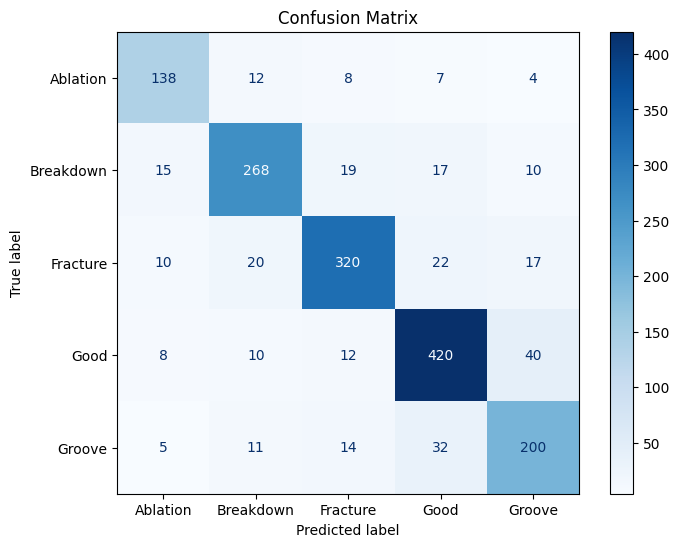

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix values
conf_matrix = np.array([
    [138, 12, 8, 7, 4],
    [15, 268, 19, 17, 10],
    [10, 20, 320, 22, 17],
    [8, 10, 12, 420, 40],
    [5, 11, 14, 32, 200]
])

# Class labels
labels = ["Ablation", "Breakdown", "Fracture", "Good", "Groove"]

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)

# Plot with colormap
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix")
plt.show()
